In [1]:
#solution 1.1

import numpy as np

def gradient(func, x, h=1e-3):
    
    x = np.asarray(x, dtype=float)
    grad = np.zeros_like(x)
    fx = func(x)
    for i in range(x.size):
        ei = np.zeros_like(x)
        ei[i] = 1.0
        grad[i] = (func(x + h*ei) - func(x - h*ei)) / (2.0*h)
    return grad






def gradient_descent_path(func, initial_guess, learning_rate=1e-2, h=1e-3, conv_criterion=1e-6, max_iter=1000):
   
    x = np.asarray(initial_guess, dtype=float).copy()
    path = [x.copy()]

    for it in range(1, max_iter+1):
        g = gradient(func, x, h=h)
        gnorm = np.linalg.norm(g, ord=2)

        if gnorm < conv_criterion or not np.isfinite(gnorm):
            return np.vstack(path), (gnorm < conv_criterion), it-1, gnorm

        x = x - learning_rate * g
        if not np.all(np.isfinite(x)):
            # Bail out if we diverged into NaNs/Infs
            return np.vstack(path), False, it, np.nan
        path.append(x.copy())

    # max_iter
    final_g = gradient(func, x, h=h)
    return np.vstack(path), False, max_iter, np.linalg.norm(final_g, ord=2)


start=(-8.0, 7.0) | converged=True | iters=3 | ||grad||=0.00e+00 | final=(572586249419380096.000000, -13421772752572.638672) | f(final)=107488909565067245995517104314716392720297586481107164984465233190846464.000000


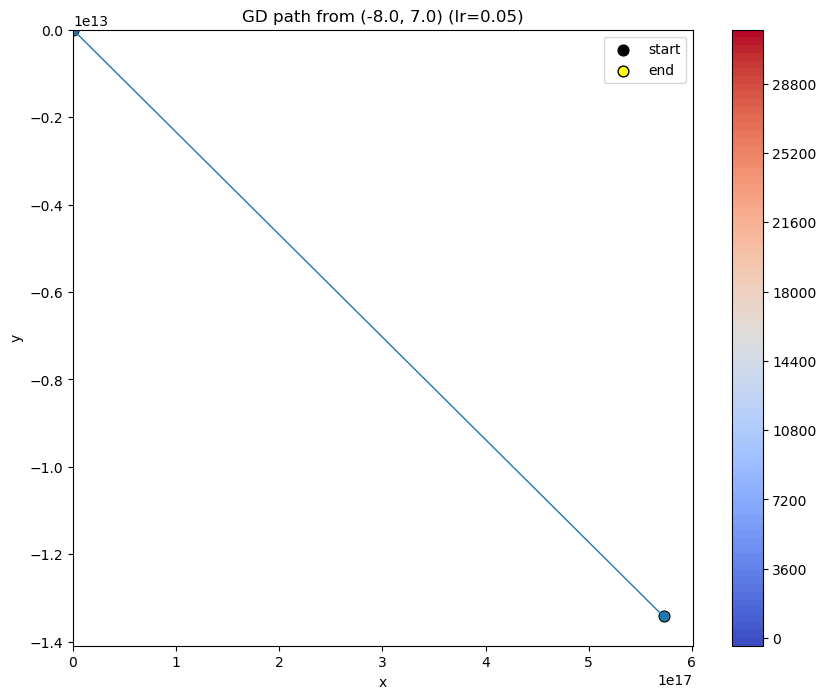

start=(8.0, 8.0) | converged=True | iters=3 | ||grad||=0.00e+00 | final=(-11379146751615386.000000, -761580748643850.000000) | f(final)=16766696657504080580111759343468119332179076852101836872672608256.000000


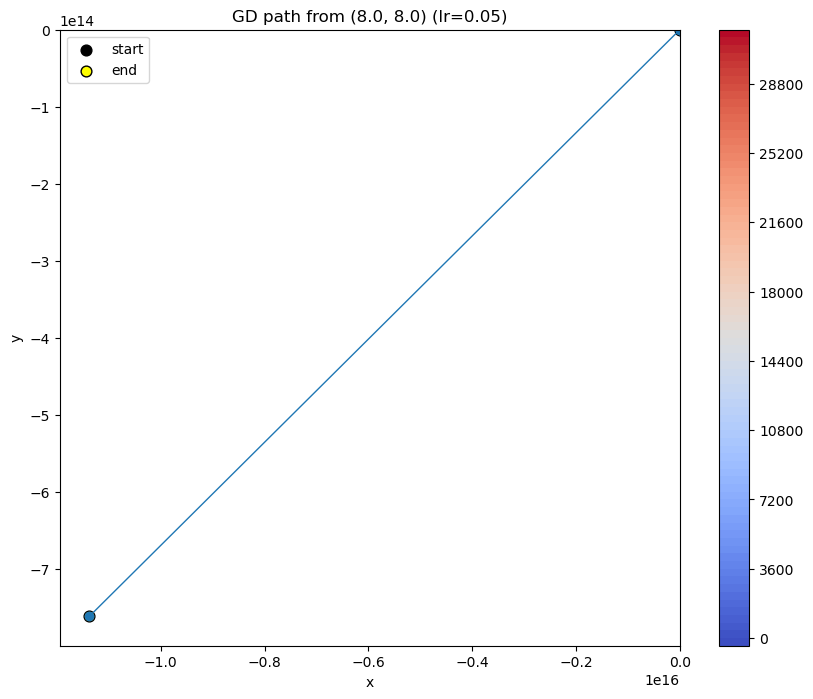

start=(-6.0, -6.0) | converged=True | iters=3 | ||grad||=0.00e+00 | final=(18346395484.796780, 963049183114.448853) | f(final)=860189082080680362748983308741605175267464052736.000000


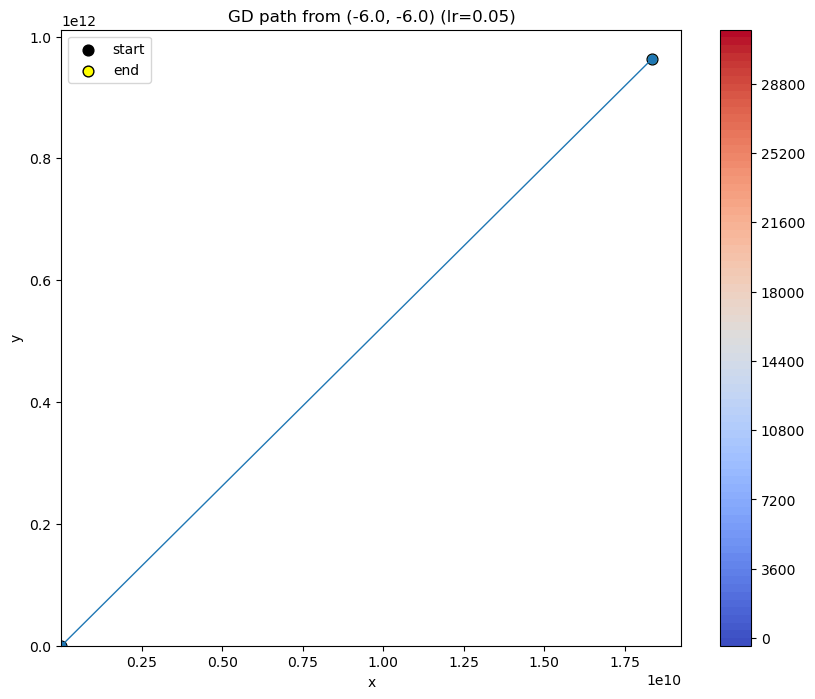

start=(0.0, 9.0) | converged=True | iters=3 | ||grad||=0.00e+00 | final=(18.982169, -950910975831847.000000) | f(final)=817634938272575394948408091629052777222943847869052845293568.000000


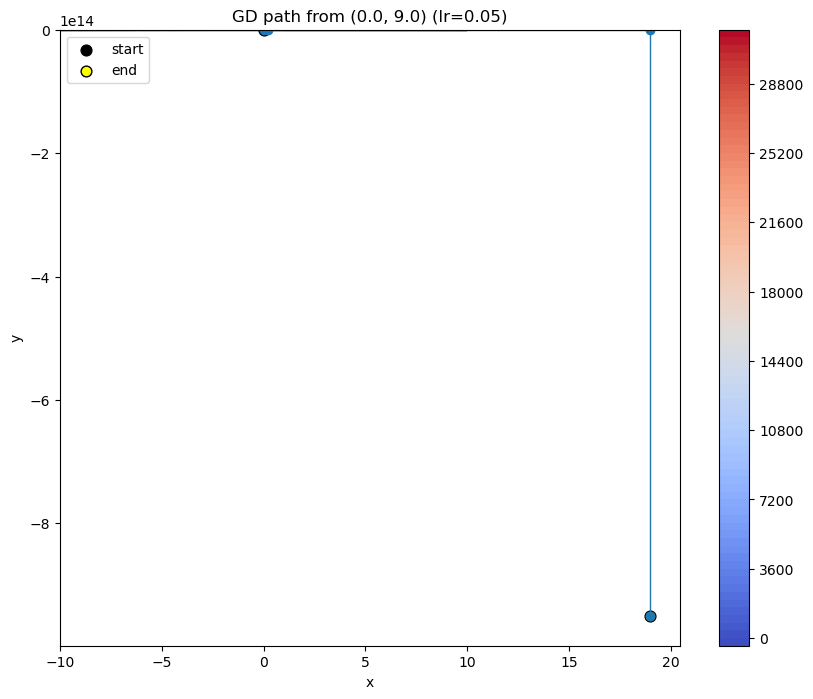

lr=1e-04 | converged=False | iters=20000 | ||grad||=1.53e-01 | final=(0.119937, 1.131853) | f(final)=0.762985


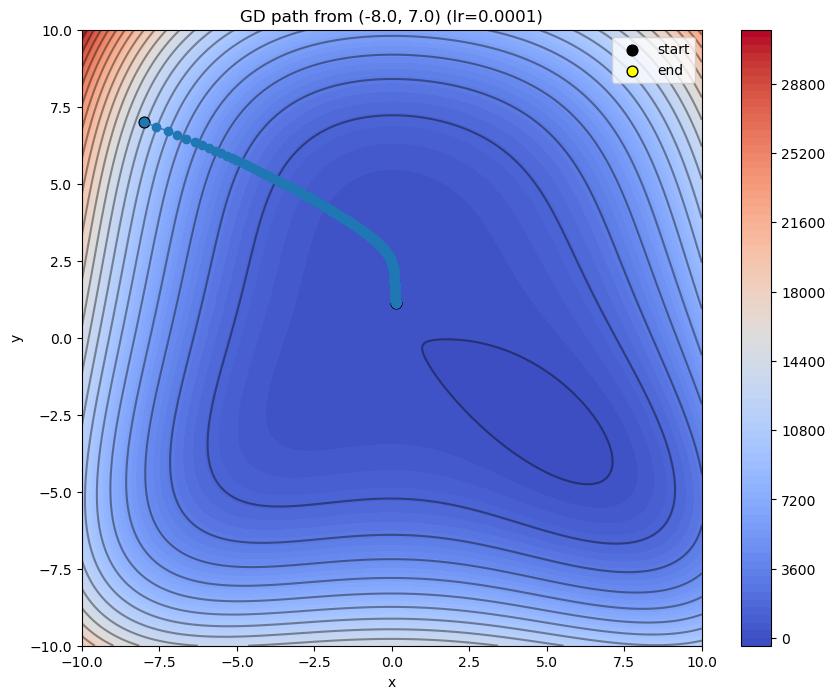

lr=5e-04 | converged=False | iters=20000 | ||grad||=5.20e-05 | final=(0.192351, 0.547773) | f(final)=0.669985


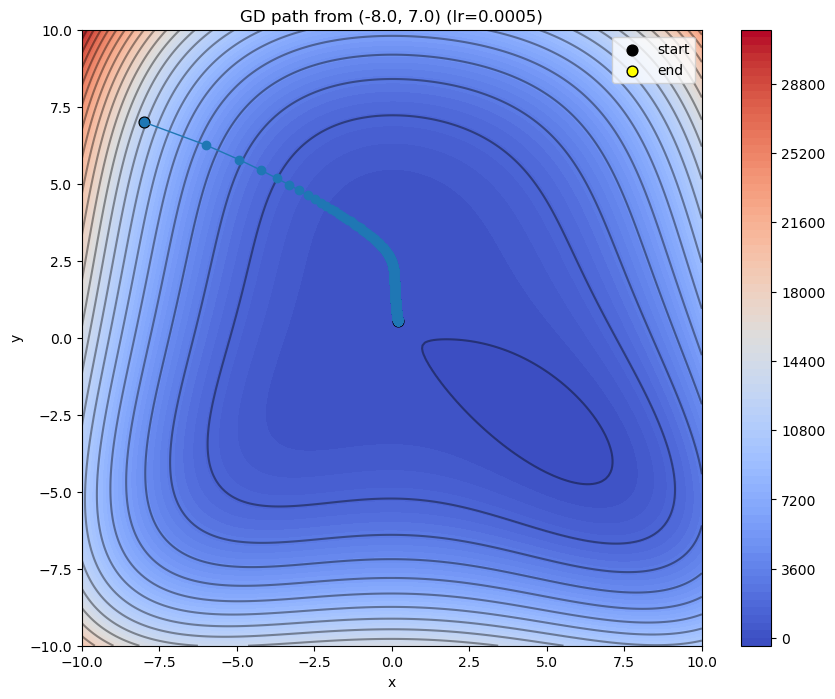

lr=2e-03 | converged=True | iters=6231 | ||grad||=1.00e-06 | final=(0.192358, 0.547741) | f(final)=0.669985


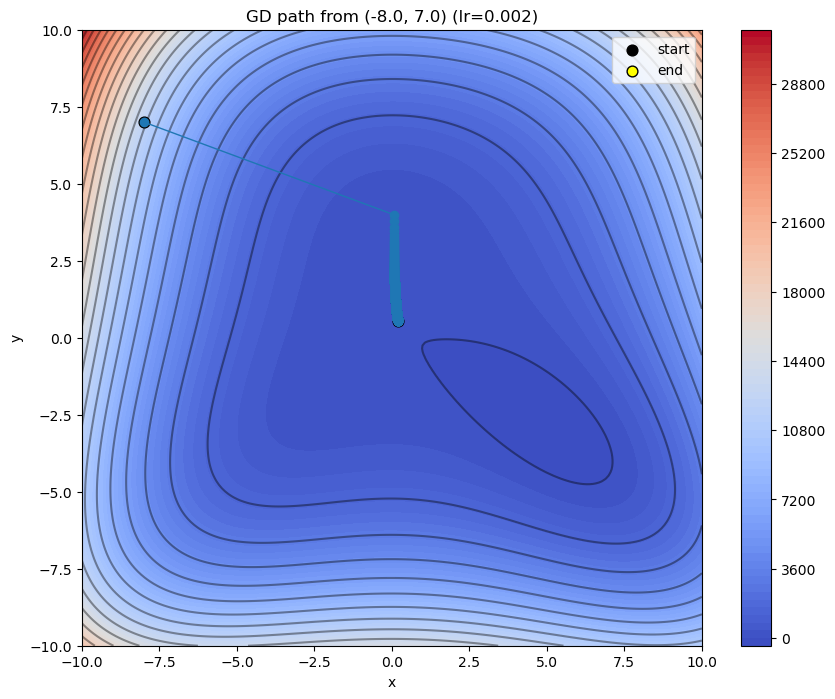

lr=1e-02 | converged=True | iters=4 | ||grad||=0.00e+00 | final=(-8995940255672504942592.000000, -108276.565804) | f(final)=6549169793153174761289075997281731156183891775698376750364434489835753567558155466964992.000000


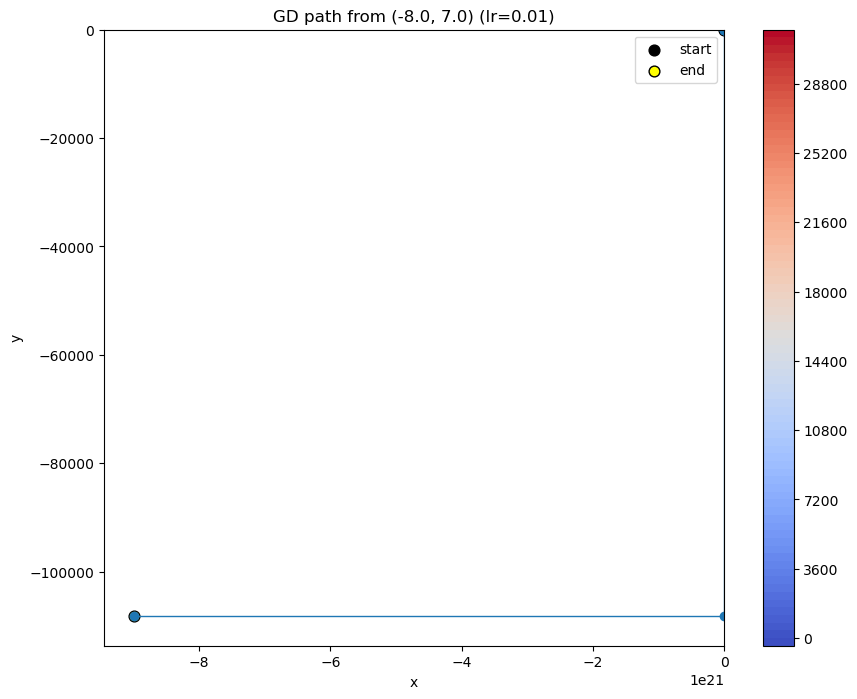

lr=5e-02 | converged=True | iters=3 | ||grad||=0.00e+00 | final=(572586249419380096.000000, -13421772752572.638672) | f(final)=107488909565067245995517104314716392720297586481107164984465233190846464.000000


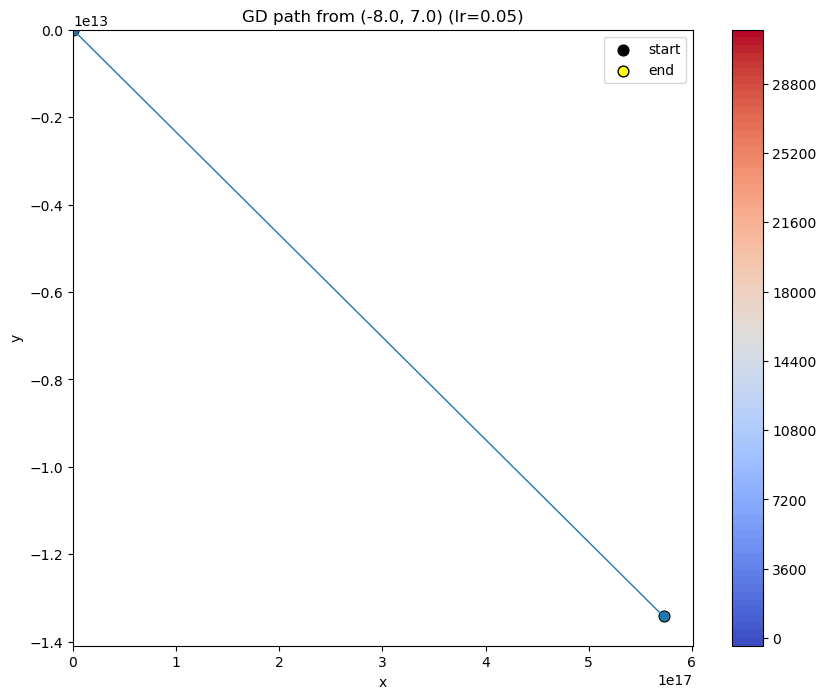

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Test function 
def f(args):
    x, y = args
    return (x-1)**4 + (y-1)**4 + 10 * x**2 * y

def plot_contour_figure():
    x = np.linspace(-10, 10, 200)
    y = np.linspace(-10, 10, 200)
    X, Y = np.meshgrid(x, y)
    Z = np.array([f([i, j]) for j in y for i in x]).reshape(len(y), len(x))
    fig, ax = plt.subplots(figsize=(10, 8))
    cf = ax.contourf(X, Y, Z, 100, cmap='coolwarm')
    ax.contour(X, Y, Z, 20, colors='k', alpha=0.4)
    fig.colorbar(cf)
    ax.set_xlabel("x"); ax.set_ylabel("y")
    return fig, ax

def show_path(title, path):
    fig, ax = plot_contour_figure()
    ax.plot(path[:,0], path[:,1], marker='o', linewidth=1)
    ax.scatter(path[0,0], path[0,1], s=60, c='black', label='start')
    ax.scatter(path[-1,0], path[-1,1], s=60, c='yellow', edgecolors='k', label='end')
    ax.set_title(title); ax.legend()
    plt.show()

# (A) Different initial guesses (fixed learning rate)
starts = [(-8., 7.), (8., 8.), (-6., -6.), (0., 9.)]
lr = 5e-2  
for s in starts:
    path, conv, iters, gnorm = gradient_descent_path(
        f, s, learning_rate=lr, h=1e-6, conv_criterion=1e-6, max_iter=15000
    )
    print(f"start={s} | converged={conv} | iters={iters} | ||grad||={gnorm:.2e} | "
          f"final=({path[-1,0]:.6f}, {path[-1,1]:.6f}) | f(final)={f(path[-1]):.6f}")
    show_path(f"GD path from {s} (lr={lr})", path)

# (B) Fixed start, varying learning rates
fixed_start = (-8., 7.)
lrs = [1e-4, 5e-4, 2e-3, 1e-2, 5e-2]  # last ones may overshoot/diverge
for alpha in lrs:
    path, conv, iters, gnorm = gradient_descent_path(
        f, fixed_start, learning_rate=alpha, h=1e-6, conv_criterion=1e-6, max_iter=20000
    )
    print(f"lr={alpha:.0e} | converged={conv} | iters={iters} | ||grad||={gnorm:.2e} | "
          f"final=({path[-1,0]:.6f}, {path[-1,1]:.6f}) | f(final)={f(path[-1]):.6f}")
    show_path(f"GD path from {fixed_start} (lr={alpha})", path)
